# Dream House Price Prediction

ROADMAP TO THIS LINEAR REGRESSION BASED HOUSE PRICE PREDICTION PREDICTION MODEL

1. Import all the dependencies of the project
2. Read dataset and observe features of the dataset carefully.
3. The dataset has over eighty independent variables of dataype float, integer or object. My approach to handle so many features in a model is to plot a correlation matrix for variables and segregate the numerical variables with a stronger positive or negation correlation with the target variable. To visualise the magnitude of correlation a heatmap can also be plot.
4. The next step is feature engineering. This include removing null values and outliers from the dataset. The null values or NA values in dataset are observed carefully. Later, a normality curve is plot to observe the skewed behaviour of feature to choose right quantity for adjusting empty cells in dataset. Also, some of the variables have almost more than seventy percent instances as null values. Those features are dropped from the dataframe.
5. Similary, The object datatype variables are append through the value count. That is the category with highest mode is used to substitue null values.
6. Next step involve combining the two dataframes that is one that contain numerical variables and other that contain categorical variables together. The final dataframe is further proccessed by creating dummy variables to give as input train dataset.
7. Now, the dataset is split using the train_test_split method of scikit learn.
8. Train dataset is fed into the model for training by importing the Linear Regression model of scikit learn.
9. The model is trained successfully!
10. The sale price is predicted and displayed against true price for comparision. The predicted price values are very close to the actual values.
11. NEXT, step involve model evaluation. In machine learning trained models are evaluated through cost functions. The most popular cost functions used tor evaluating linear regression based machine learning models is to use RMSE, MSE or MAE methods. Smaller the magnitude of cost function lesser is the residual of model or better is the model.
12. Also, in machine learning a weight is associated to each feature. That very coefficient magnitude is calculated either using gradient descent or normal equation method. The magnitude of the coefficients for all the features is calculated.
13. Finally, the evaluated model is stored in pickle.

In [1]:
#Importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("TRAINDATA.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape
print("The dataset for taining a linear regression model for Dream House Price Prediction contains", df.shape[0] ,"rows and", df.shape[1] ,"columns.")

The dataset for taining a linear regression model for Dream House Price Prediction contains 1460 rows and 81 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Dealing With Numerical Data Types

In [7]:
a=df[['SalePrice','MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SaleCondition']]

<AxesSubplot:>

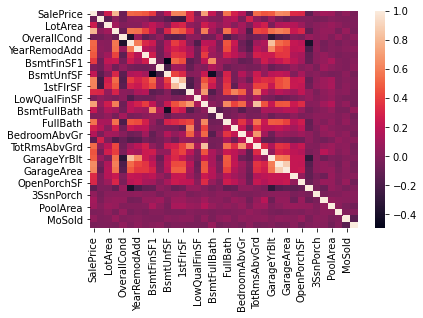

In [8]:
corr=a.corr()
sns.heatmap(corr)

In [9]:
corr

,SalePrice,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
SalePrice,1.000000,-0.084284,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,-0.011378,...,0.623431,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923
MSSubClass,-0.084284,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407
LotArea,0.263843,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261
OverallQual,0.790982,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347
OverallCond,-0.077856,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950
YearBuilt,0.522897,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618
YearRemodAdd,0.507101,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743
MasVnrArea,0.477493,0.022936,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201
BsmtFinSF1,0.386420,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359
BsmtFinSF2,-0.011378,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706


Now, we would try to analyse the correaltion between all the independent variables with respect to the dependent variable 'Sale Price' and select the significant variables.

In [10]:
b=df[['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea']]

In [11]:
b.isnull().sum()

OverallQual      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt     81
GarageCars       0
GarageArea       0
dtype: int64

In [12]:
c=df['MasVnrArea'].mean()

In [13]:
b['MasVnrArea']=b['MasVnrArea'].fillna(c)

<ipython-input-13-b673d5a7b967>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['MasVnrArea']=b['MasVnrArea'].fillna(c)


In [14]:
b['MasVnrArea'].isnull().sum()

0

In [15]:
b['GarageYrBlt'].isnull().sum()

81

Now, to replace the null values as the count of null values is pretty small it is better to choose the mode value of the value_count of the independent variables.

In [16]:
b['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1906.0     1
1908.0     1
1933.0     1
1900.0     1
1927.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

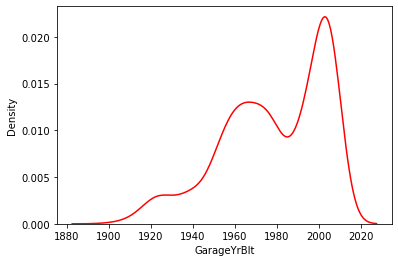

In [17]:
sns.kdeplot(x='GarageYrBlt', data=b, color='red')

In [18]:
d=b['GarageYrBlt'].mode()
print(d)

0    2005.0
dtype: float64


In [19]:
b['GarageYrBlt']=b['GarageYrBlt'].fillna(2005)

<ipython-input-19-9d6229d2e18c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['GarageYrBlt']=b['GarageYrBlt'].fillna(2005)


In [20]:
b['GarageYrBlt'].isnull().sum()

0

# Dealing With Object Data Types

The object data types have missing values while some of the variables have greater than 90% null values. The values are to be replaced with appropriate substitutes while the varibales with values missing in significant number are to be dropped from the dataset. Below ids the pandas dataframe 'c' with all the object type independent variables.

In [21]:
c=df[['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']]

In [22]:
c['Alley'].isnull().sum()

1369

In [23]:
j=((df['Alley'].isnull().sum())/1460)*100
print("The percent of rows missing in the feature Alley is ", j)

The percent of rows missing in the feature Alley is  93.76712328767123


In [24]:
df['MiscFeature'].isnull().sum()

1406

In [25]:
k=((df['MiscFeature'].isnull().sum())/1460)*100
print("The percent of rows missing in the feature MiscFeature is ", k)

The percent of rows missing in the feature MiscFeature is  96.30136986301369


In [26]:
c['MasVnrType'].isnull().sum()

8

In [27]:
c['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [28]:
c['MasVnrType']=c['MasVnrType'].fillna('none')

<ipython-input-28-4052980539ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['MasVnrType']=c['MasVnrType'].fillna('none')


In [29]:
c['MasVnrType'].isnull().sum()

0

In [30]:
c['BsmtQual'].isnull().sum()

37

In [31]:
c['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [32]:
c['BsmtQual']=c['BsmtQual'].fillna('TA')

<ipython-input-32-9e9346daaebe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['BsmtQual']=c['BsmtQual'].fillna('TA')


In [33]:
c['BsmtQual'].isnull().sum()

0

In [34]:
c['BsmtCond'].isnull().sum()

37

In [35]:
c['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [36]:
c['BsmtCond']=c['BsmtCond'].fillna('TA')

<ipython-input-36-cc5bbfa2eb0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['BsmtCond']=c['BsmtCond'].fillna('TA')


In [37]:
c['BsmtCond'].isnull().sum()

0

In [38]:
c['BsmtExposure'].isnull().sum()

38

In [39]:
c['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [40]:
c['BsmtExposure']=c['BsmtExposure'].fillna('No')
c['BsmtExposure'].isnull().sum()

<ipython-input-40-59366934d11c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['BsmtExposure']=c['BsmtExposure'].fillna('No')


0

In [41]:
c['BsmtFinType1'].isnull().sum()

37

In [42]:
c['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [43]:
c['BsmtFinType1']=c['BsmtFinType1'].fillna('unf')
c['BsmtFinType1'].isnull().sum()

<ipython-input-43-bc069681da1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['BsmtFinType1']=c['BsmtFinType1'].fillna('unf')


0

In [44]:
c['BsmtFinType2'].isnull().sum()

38

In [45]:
c['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [46]:
c['BsmtFinType2']=c['BsmtFinType2'].fillna('unf')
c['BsmtFinType2'].isnull().sum()

<ipython-input-46-3af1ccecd623>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['BsmtFinType2']=c['BsmtFinType2'].fillna('unf')


0

In [47]:
c['Electrical'].isnull().sum()

1

In [48]:
c['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [49]:
c['Electrical']=c['Electrical'].fillna('SBrkr')
c['Electrical'].isnull().sum()

<ipython-input-49-2826271a74c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['Electrical']=c['Electrical'].fillna('SBrkr')


0

In [50]:
c['FireplaceQu'].isnull().sum()

690

In [51]:
h=((c['FireplaceQu'].isnull().sum())/1460)*100
print(h)

47.26027397260274


In [52]:
c['GarageType'].isnull().sum()

81

In [53]:
c['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [54]:
c['GarageType']=c['GarageType'].fillna('Attchd')
c['GarageType'].isnull().sum()

<ipython-input-54-a860940cc968>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['GarageType']=c['GarageType'].fillna('Attchd')


0

In [55]:
c['GarageFinish'].isnull().sum()

81

In [56]:
c['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [57]:
c['GarageFinish']=c['GarageFinish'].fillna('Unf')
c['GarageFinish'].isnull().sum()

<ipython-input-57-d14731c8d27f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['GarageFinish']=c['GarageFinish'].fillna('Unf')


0

In [58]:
c['GarageQual'].isnull().sum()

81

In [59]:
c['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [60]:
c['GarageQual']=c['GarageQual'].fillna('TA')
c['GarageQual'].isnull().sum()

<ipython-input-60-2d3422f86cee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['GarageQual']=c['GarageQual'].fillna('TA')


0

In [61]:
c['GarageCond'].isnull().sum()

81

In [62]:
c['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [63]:
c['GarageCond']=c['GarageCond'].fillna('TA')
c['GarageCond'].isnull().sum()

<ipython-input-63-f1c249cadecb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['GarageCond']=c['GarageCond'].fillna('TA')


0

In [64]:
c['PoolQC'].isnull().sum()

1453

In [65]:
i=((c['PoolQC'].isnull().sum())/1460)*100
print(i)

99.52054794520548


In [66]:
c['Fence'].isnull().sum()

1179

In [67]:
g=((c['Fence'].isnull().sum())/1460)*100
print(g)

80.75342465753424


In [68]:
c['MiscFeature'].isnull().sum()

1406

In [69]:
f=((c['MiscFeature'].isnull().sum())/1460)*100
print(f)

96.30136986301369


Since, more than 80% of the data rows are null or empty in independent object variables namely 'Alley', 'MiscFeature', 'FireplaceQu', 'PoolQC' and 'Fence'. These missing data points if replaced with mode values will very much possibly happen to be misleading. Thus the better way to deal with such variables in a predicting model is to remove such data values from the trai data set.

In [70]:
c=c.drop(columns=['Alley','MiscFeature','FireplaceQu','PoolQC','Fence'])

In [71]:
c.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [72]:
c.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

Now since there are no more null values in the selected object variables, they dummy variables can be created successfully.

In [73]:
c=pd.get_dummies(c[['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']],prefix="var").astype(int)
c.head()

,var_C (all),var_FV,var_RH,var_RL,var_RM,var_Grvl,var_Pave,var_IR1,var_IR2,var_IR3,...,var_ConLw,var_New,var_Oth,var_WD,var_Abnorml,var_AdjLand,var_Alloca,var_Family,var_Normal,var_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


# Feeding Data For Training Model

In [74]:
b.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea
0,7,2003,2003,196.0,856,856,1710,2,8,0,2003.0,2,548
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,1976.0,2,460
2,7,2001,2002,162.0,920,920,1786,2,6,1,2001.0,2,608
3,7,1915,1970,0.0,756,961,1717,1,7,1,1998.0,3,642
4,8,2000,2000,350.0,1145,1145,2198,2,9,1,2000.0,3,836


In [75]:
result = pd.concat([b, c], axis=1)

In [76]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 250 entries, OverallQual to var_Partial
dtypes: float64(2), int32(237), int64(11)
memory usage: 1.5 MB


In [77]:
result.shape

(1460, 250)

In [78]:
result.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,...,var_ConLw,var_New,var_Oth,var_WD,var_Abnorml,var_AdjLand,var_Alloca,var_Family,var_Normal,var_Partial
0,7,2003,2003,196.0,856,856,1710,2,8,0,...,0,0,0,1,0,0,0,0,1,0
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,...,0,0,0,1,0,0,0,0,1,0
2,7,2001,2002,162.0,920,920,1786,2,6,1,...,0,0,0,1,0,0,0,0,1,0
3,7,1915,1970,0.0,756,961,1717,1,7,1,...,0,0,0,1,1,0,0,0,0,0
4,8,2000,2000,350.0,1145,1145,2198,2,9,1,...,0,0,0,1,0,0,0,0,1,0


In [79]:
X=result
y=df['SalePrice']

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
print("The shape of the independent train data set is: ", X_train.shape)
print("The shape of the Target variable train data set is: ", y_train.shape)
print("The shape of the independent test data set is: ", X_test.shape)
print("The shape of the Target variable test data set is: ", y_test.shape)

The shape of the independent train data set is:  (1022, 250)
The shape of the Target variable train data set is:  (1022,)
The shape of the independent test data set is:  (438, 250)
The shape of the Target variable test data set is:  (438,)


In [82]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train, y_train)

LinearRegression(normalize=True)

# Model Evaluation

The model can be evaluated by checking out it's co-efficients and how we can interpret the magnitude of these co-efficients.

In [83]:
print(lin_reg.intercept_)

-1.9457350217230547e+17


In [84]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
OverallQual,6.812778e+03
YearBuilt,1.482319e+02
YearRemodAdd,2.646982e+02
MasVnrArea,1.359338e+01
TotalBsmtSF,2.617581e+01
...,...
var_AdjLand,-1.094715e+17
var_Alloca,-1.094715e+17
var_Family,-1.094715e+17
var_Normal,-1.094715e+17


# Model Predictions

The predictions of the House Price Linear Regression Model will be.

In [85]:
pred = lin_reg.predict(X_test)

In [86]:
output=pd.DataFrame({'TRUE_VALUES': y_test, 'PREDICTED_VALUES':pred, 'Error_Values': (y_test-pred)})
output

,TRUE_VALUES,PREDICTED_VALUES,Error_Values
892,154500,151616.0,2884.0
1105,325000,360640.0,-35640.0
413,115000,83968.0,31032.0
522,159000,196864.0,-37864.0
1036,315500,340736.0,-25236.0
...,...,...,...
331,139000,131136.0,7864.0
323,126175,122304.0,3871.0
650,205950,217920.0,-11970.0
439,110000,106560.0,3440.0


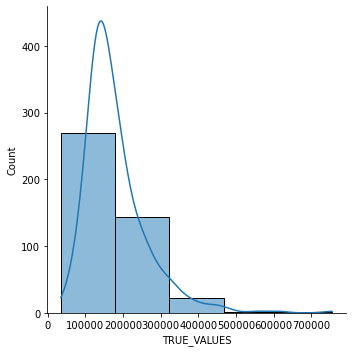

In [87]:
sns.displot(x='TRUE_VALUES', kde=True, bins=5, data=output)

<AxesSubplot:xlabel='TRUE_VALUES'>

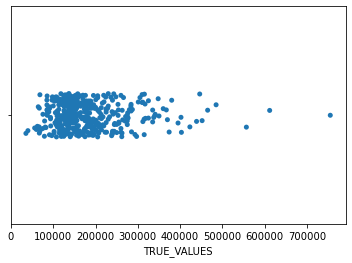

In [88]:
sns.stripplot(x='TRUE_VALUES', data=output)

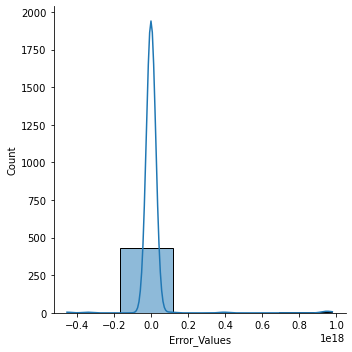

In [89]:
sns.displot(x='Error_Values', kde=True, bins=5, data=output)

Regression Evaluation Metrics

1. Mean Absolute Error(MAE) - It is the mean of the absolute value of the errors.

2. Mean Squared Error(MSE) - It is the mean of the squared error.

3. Root Mean Squared Error(RMSE) - It is the square root of the mean of the squared errors.

In [90]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print()
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [91]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:')
print()
print_evaluate(y_test, test_pred)
print('Train set evaluation:')
print()
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 9489561540884420.0
MSE: 7.348507897755412e+33
RMSE: 8.572343843871064e+16
R2 Square -1.0530824247288769e+24

Train set evaluation:

MAE: 14031.109589041096
MSE: 460600610.37182
RMSE: 21461.607823549006
R2 Square 0.9234701611988502



In [92]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,9.489562e+15,7.348508e+33,8.572344e+16,-1.053082e+24,0.824116


# Saving Model Using Pickle

In [93]:
import pickle

In [94]:
with open('Dream House Price Prediction Model','wb') as f:
    pickle.dump(df, f)

In [95]:
with open('Dream House Price Prediction Model', 'rb') as f:
    model=pickle.load(f)

In [96]:
print("NAME : DIKSHA DESWAL")
print("TEAM : GOAL DIGGERS")
print('____________X_______________X_____________X______________X______________X______________X____________X___________X____________')

NAME : DIKSHA DESWAL
TEAM : GOAL DIGGERS
____________X_______________X_____________X______________X______________X______________X____________X___________X____________
